# Assignment - 1
# Predictive Modelling of Eating-Out Problem

### Student's name: Chloe Huynh
### Student's ID: u3245751

## Part B - Predictive Modelling

## I. Feature Engineering

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
data_path = "data/zomato_df_final_data.csv"
df = pd.read_csv(data_path)
df.head()

,address,cost,cuisine,lat,link,lng,phone,rating_number,rating_text,subzone,title,type,votes,groupon,color,cost_2,cuisine_color
0,"371A Pitt Street, CBD, Sydney",50.0,"['Hot Pot', 'Korean BBQ', 'BBQ', 'Korean']",-33.876059,https://www.zomato.com/sydney/sydney-madang-cbd,151.207605,02 8318 0406,4.0,Very Good,CBD,Sydney Madang,['Casual Dining'],1311.0,False,#e15307,5.243902,#6f706b
1,"Shop 7A, 2 Huntley Street, Alexandria, Sydney",80.0,"['Cafe', 'Coffee and Tea', 'Salad', 'Poké']",-33.910999,https://www.zomato.com/sydney/the-grounds-of-a...,151.193793,02 9699 2225,4.6,Excellent,"The Grounds of Alexandria, Alexandria",The Grounds of Alexandria Cafe,['Café'],3236.0,False,#9c3203,7.560976,#6f706b
2,"Level G, The Darling at the Star, 80 Pyrmont ...",120.0,['Japanese'],-33.867971,https://www.zomato.com/sydney/sokyo-pyrmont,151.195210,1800 700 700,4.9,Excellent,"The Star, Pyrmont",Sokyo,['Fine Dining'],1227.0,False,#7f2704,10.650407,#6f706b
3,"Sydney Opera House, Bennelong Point, Circular...",270.0,['Modern Australian'],-33.856784,https://www.zomato.com/sydney/bennelong-restau...,151.215297,02 9240 8000,4.9,Excellent,Circular Quay,Bennelong Restaurant,"['Fine Dining', 'Bar']",278.0,False,#7f2704,22.235772,#4186f4
4,"20 Campbell Street, Chinatown, Sydney",55.0,"['Thai', 'Salad']",-33.879035,https://www.zomato.com/sydney/chat-thai-chinatown,151.206409,02 8317 4811,4.5,Excellent,Chinatown,Chat Thai,['Casual Dining'],2150.0,False,#a83703,5.630081,#6f706b


In [3]:
# Cuisine processing 
df['cuisine'] = df['cuisine'].str.split(', ')
cuisine_df = df.explode("cuisine").reset_index(drop=True)
cuisine_df['cuisine'] = cuisine_df['cuisine'].astype(str)
cuisine_df['cuisine'] = cuisine_df['cuisine'].str.replace('[', '')
cuisine_df['cuisine'] = cuisine_df['cuisine'].str.replace("'", '')
cuisine_df['cuisine'] = cuisine_df['cuisine'].str.replace("]", '')

/var/folders/02/lspf_dmn19g6q514lw374fl00000gn/T/ipykernel_1808/197613143.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cuisine_df['cuisine'] = cuisine_df['cuisine'].str.replace('[', '')
/var/folders/02/lspf_dmn19g6q514lw374fl00000gn/T/ipykernel_1808/197613143.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cuisine_df['cuisine'] = cuisine_df['cuisine'].str.replace("]", '')


In [4]:
# Type column processing 
cuisine_df['type'] = cuisine_df ['type'].str.split(', ')
cuisine_df = cuisine_df.explode("type").reset_index(drop=True)
cuisine_df['type'] = cuisine_df['type'].astype(str)
cuisine_df['type'] = cuisine_df['type'].str.replace('[', '')
cuisine_df['type'] = cuisine_df['type'].str.replace("'", '')
cuisine_df['type'] = cuisine_df['type'].str.replace("]", '')

/var/folders/02/lspf_dmn19g6q514lw374fl00000gn/T/ipykernel_1808/1900844298.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cuisine_df['type'] = cuisine_df['type'].str.replace('[', '')
/var/folders/02/lspf_dmn19g6q514lw374fl00000gn/T/ipykernel_1808/1900844298.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cuisine_df['type'] = cuisine_df['type'].str.replace("]", '')


### Explore data analysis

In [5]:
# Data shape
print(cuisine_df.shape)

(18644, 17)


In [6]:
# Summary of dataset
print(cuisine_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18644 entries, 0 to 18643
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        18644 non-null  object 
 1   cost           18060 non-null  float64
 2   cuisine        18644 non-null  object 
 3   lat            18304 non-null  float64
 4   link           18644 non-null  object 
 5   lng            18304 non-null  float64
 6   phone          18644 non-null  object 
 7   rating_number  13240 non-null  float64
 8   rating_text    13240 non-null  object 
 9   subzone        18644 non-null  object 
 10  title          18644 non-null  object 
 11  type           18644 non-null  object 
 12  votes          13240 non-null  float64
 13  groupon        18644 non-null  bool   
 14  color          18644 non-null  object 
 15  cost_2         18060 non-null  float64
 16  cuisine_color  18644 non-null  object 
dtypes: bool(1), float64(6), object(10)
memory usage: 2

In [7]:
# Deleting Unnnecessary Columns
cuisine_df=cuisine_df.drop(['link','color','phone','cuisine_color','address','lat','lng'],axis=1) 

In [8]:
# Summary of missing value in dataset
count_missing_df = cuisine_df.isna().sum()
count_missing_df

cost              584
cuisine             0
rating_number    5404
rating_text      5404
subzone             0
title               0
type                0
votes            5404
groupon             0
cost_2            584
dtype: int64

In [9]:
# Display categorical variables
categorical = [var for var in cuisine_df.columns if cuisine_df[var].dtypes == 'O']
print("There are {} categorical variables\n".format(len(categorical)))
print("The categorical variables are: ", categorical)

There are 5 categorical variables

The categorical variables are:  ['cuisine', 'rating_text', 'subzone', 'title', 'type']


In [10]:
# Percentage of missing values in each variable
round(cuisine_df[categorical].isnull().mean(), 2)

cuisine        0.00
rating_text    0.29
subzone        0.00
title          0.00
type           0.00
dtype: float64

In [11]:
# Impute missing categorical variables with most frequent value (i.e., mode)
for df_temp in [cuisine_df]:
    for col in categorical:
        col_mode = cuisine_df[col].mode()[0] # get it only from training
        df_temp[col].fillna(col_mode, inplace=True)

# Check again missing values in numerical variables in X_train
cuisine_df[categorical].isnull().sum()

cuisine        0
rating_text    0
subzone        0
title          0
type           0
dtype: int64

In [12]:
# Display numerical variables
numericals = [var for var in cuisine_df.columns if cuisine_df[var].dtypes != 'O']
print('There are {} numerical variables\n'.format(len(numericals)))
print('The numerical variables are :', numericals)

There are 5 numerical variables

The numerical variables are : ['cost', 'rating_number', 'votes', 'groupon', 'cost_2']


In [13]:
# Percentage of missing values in each variable
round(cuisine_df[numericals].isnull().mean(), 2)

cost             0.03
rating_number    0.29
votes            0.29
groupon          0.00
cost_2           0.03
dtype: float64

In [14]:
# Impute the missing values with the median values
for df_temp in [cuisine_df]:
    for col in numericals:
        col_median = cuisine_df[col].median() 
        df_temp[col].fillna(col_median, inplace=True)
    
# Check again missing values in numerical variables
cuisine_df[numericals].isnull().sum()

cost             0
rating_number    0
votes            0
groupon          0
cost_2           0
dtype: int64

In [15]:
# Summary statistics in numerical variables
print(round(cuisine_df[numericals].describe()), 2)

          cost  rating_number    votes   cost_2
count  18644.0        18644.0  18644.0  18644.0
mean      53.0            3.0     80.0      5.0
std       28.0            0.0    168.0      2.0
min        8.0            2.0      4.0      2.0
25%       35.0            3.0     21.0      4.0
50%       45.0            3.0     39.0      5.0
75%       65.0            4.0     68.0      6.0
max      500.0            5.0   3236.0     40.0 2


Text(0, 0.5, 'Rating')

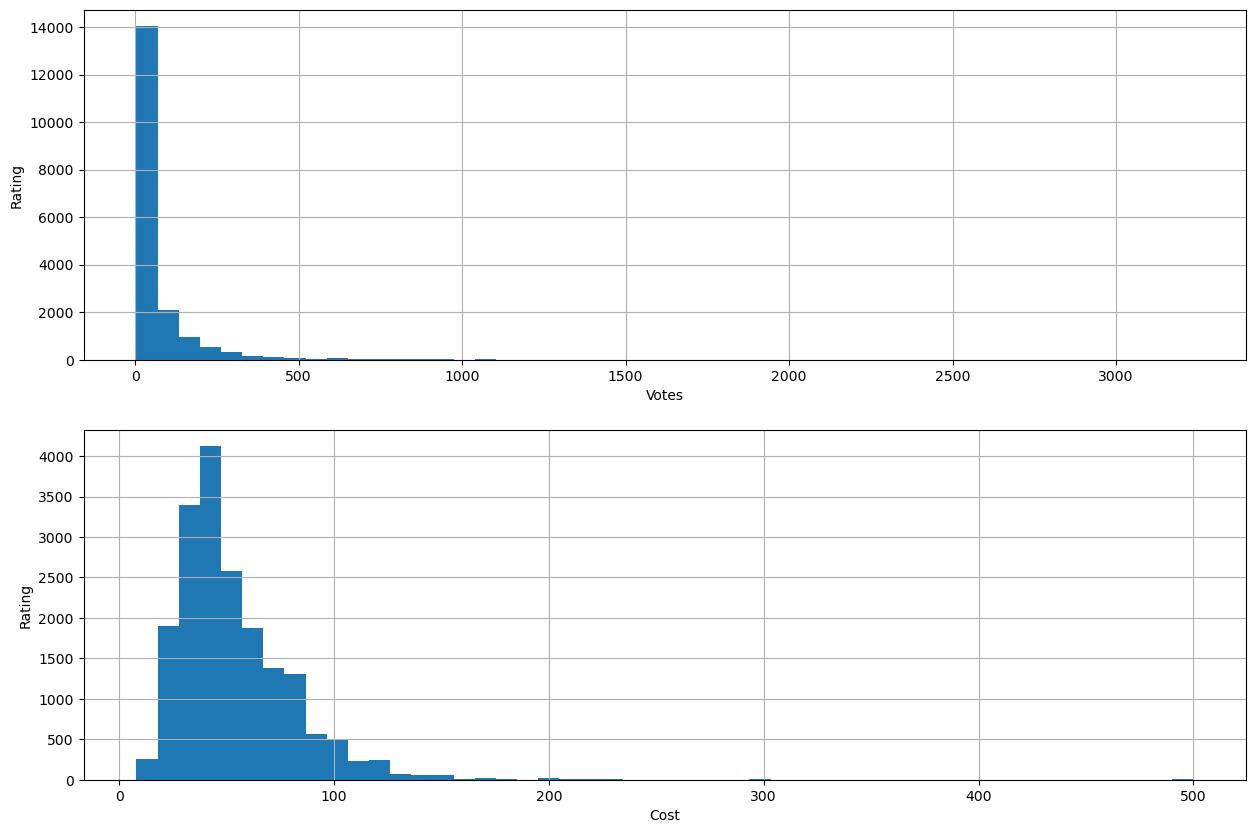

In [16]:
# Plot histogram to check distribution
y = cuisine_df['rating_number']
plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
fig = cuisine_df['votes'].hist(bins=50)
fig.set_xlabel('Votes')
fig.set_ylabel('Rating')

plt.subplot(2, 1, 2)
fig = cuisine_df['cost'].hist(bins=50)
fig.set_xlabel('Cost')
fig.set_ylabel('Rating')

Text(0, 0.5, 'Votes')

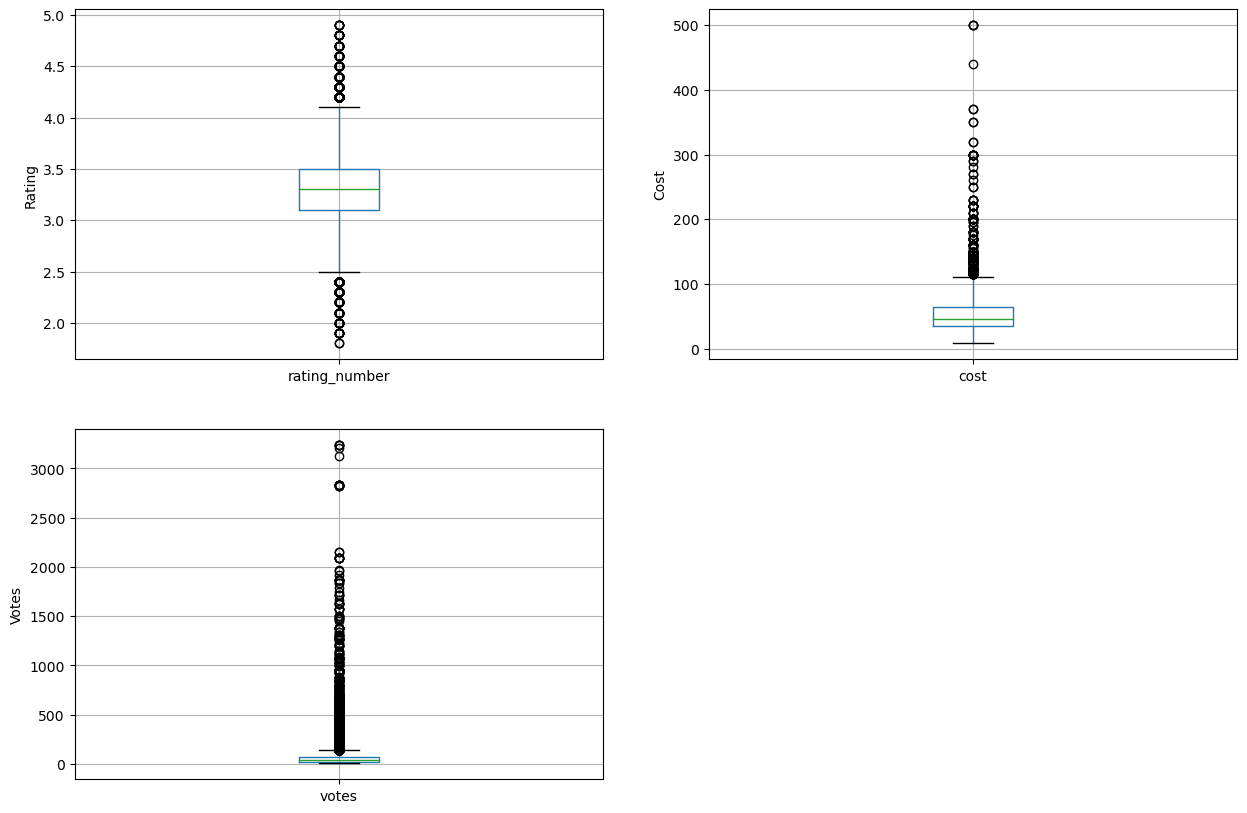

In [17]:
# Build boxplots to visualise outliers in these variables
plt.figure(figsize=(15, 10))

plt.subplot(2,2,1)
fig = cuisine_df.boxplot(column= 'rating_number')
fig.set_title('')
fig.set_ylabel('Rating')

plt.subplot(2,2,2)
fig = cuisine_df.boxplot(column= 'cost')
fig.set_title('')
fig.set_ylabel('Cost')

plt.subplot(2,2,3)
fig = cuisine_df.boxplot(column= 'votes')
fig.set_title('')
fig.set_ylabel('Votes')

In [21]:
# Find outliers in these variables
def find_outliers(variable, factor= 3, print_summary=True):
    IQR = cuisine_df[variable].quantile(0.75) - cuisine_df[variable].quantile(0.25)
    Lower_boundary = cuisine_df[variable].quantile(0.25) - (IQR * factor)
    Upper_boundary = cuisine_df[variable].quantile(0.75) + (IQR * factor)
    
    outliers= []
    for index, val in enumerate(cuisine_df[variable]):
        if val < Lower_boundary or val > Upper_boundary:
            outliers.append(index)
    
    if(print_summary):
        print('{variable} outliers are values < {lowerboundary} or > {upperboundary}'.format(variable= variable, lowerboundary=Lower_boundary, upperboundary=Upper_boundary))
    return Lower_boundary, Upper_boundary, outliers

In [22]:
_,_,_ = find_outliers('cost')

cost outliers are values < -55.0 or > 155.0


In [23]:
_,_,_ = find_outliers('cost')

cost outliers are values < -55.0 or > 155.0


In [24]:
_,_,_ = find_outliers('votes')

votes outliers are values < -120.0 or > 209.0


In [26]:
# Replace the outliers with some predefined the maximum value for each variable
def max_value(df_temp, variable, top):
    return np.where(df_temp[variable]>top, top, df_temp[variable])

cols_with_outliers = {'cost': 160, 
                      'votes': 377
                     }
for df_temp in [cuisine_df]:
    for col in cols_with_outliers:
        df_temp[col] = max_value(df_temp, col, cols_with_outliers[col])

In [27]:
cuisine_df.cost.max()

160.0

In [28]:
cuisine_df.votes.max()

377.0

In [29]:
cuisine_df.rating_number.max()

4.9

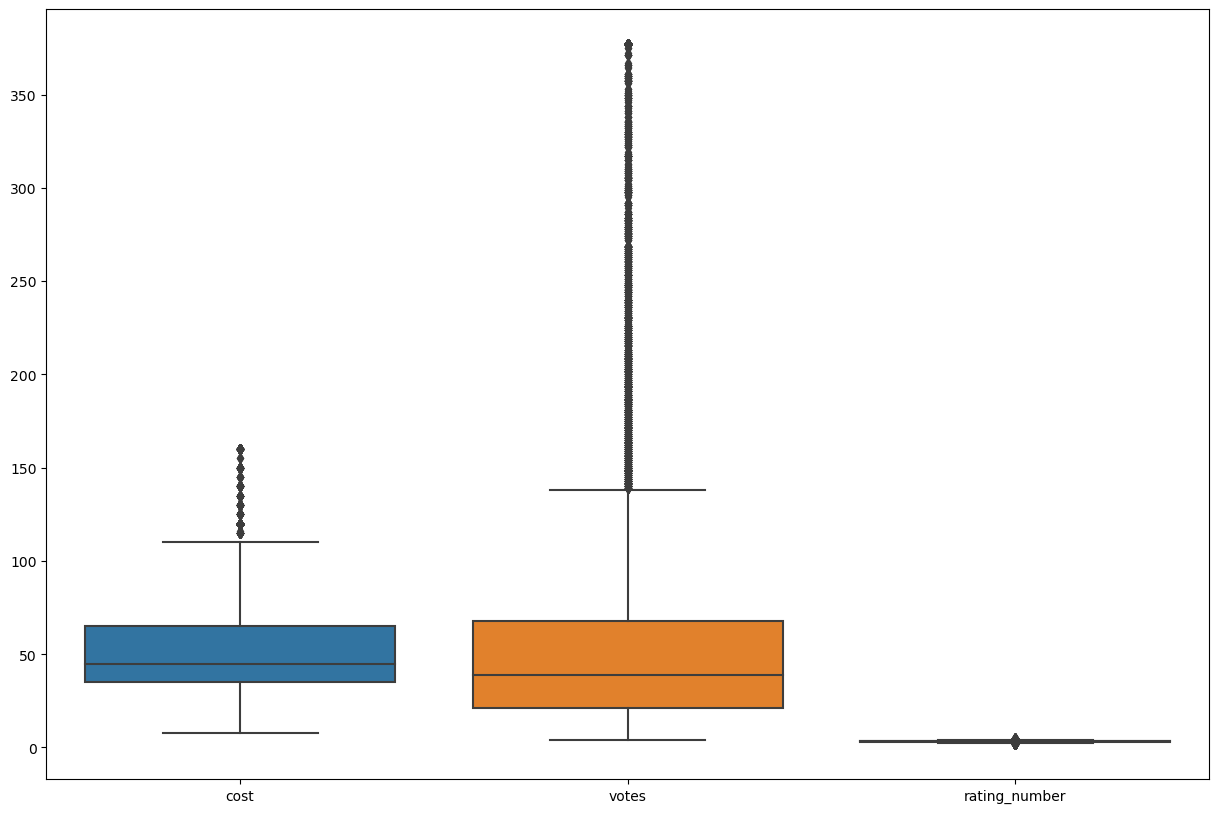

In [30]:
# Build boxplot for variables
df_custom = cuisine_df[['cost', 'votes', 'rating_number']]
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=df_custom, orient='v')

### Create feature enginerring

In [34]:
# Log Transformation of Cost
cuisine_df['log_cost'] = np.log1p(df['cost'])

In [35]:
# Normalizing Rating
cuisine_df['normalized_rating'] = (cuisine_df['rating_number'] - cuisine_df['rating_number'].min()) / (cuisine_df['rating_number'].max() - cuisine_df['rating_number'].min())

In [36]:
# High Votes Feature
median_votes = cuisine_df['votes'].median()
cuisine_df['high_votes'] = (cuisine_df['votes'] > median_votes).astype(int)

In [37]:
# Average Rating by Cuisine
cuisine_df['average_rating_by_cuisine'] = cuisine_df.groupby('cuisine')['rating_number'].transform('mean')

In [38]:
# Interaction Feature
cuisine_df['cost_rating_interaction'] = cuisine_df['cost'] * cuisine_df['normalized_rating']

### Encoding variables

In [39]:
# Encode the input Variables
def Encoder(cuisine_df):
    for column in cuisine_df.columns[~cuisine_df.columns.isin(['cost', 'votes', 'normalized_rating', 'high_votes','average_rating_by_cuisine','cost_rating_interaction'])]:
        cuisine_df[column] = cuisine_df[column].factorize()[0]
    return cuisine_df

In [40]:
encode_df = Encoder(cuisine_df.copy())

Index(['cost', 'cuisine', 'rating_number', 'rating_text', 'subzone', 'title',
       'type', 'votes', 'groupon', 'cost_2', 'log_cost', 'normalized_rating',
       'high_votes', 'average_rating_by_cuisine', 'cost_rating_interaction'],
      dtype='object')

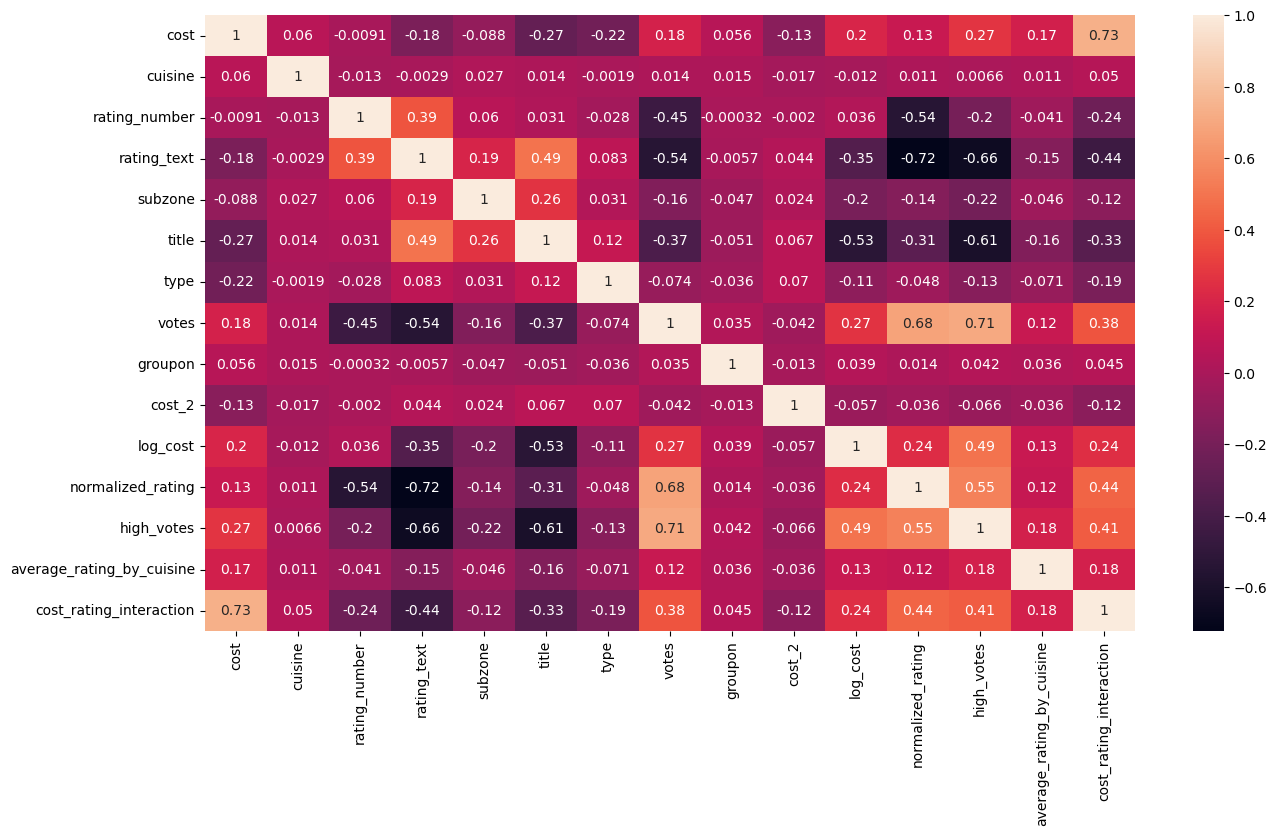

In [41]:
# Build correlation chart between different variables
corr = encode_df.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
encode_df.columns

## II. Regression

In [42]:
# Import the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [43]:
# Declare source and target variable
X = encode_df.drop(['rating_number'], axis=1)
y = encode_df['rating_number']

In [44]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# print the result
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14915, 14) (14915,)
(3729, 14) (3729,)


In [45]:
# train a logistic regression model on the training set
model_LR = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
model_LR.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [46]:
# Predict results
y_pred_LR = model_LR.predict(X_test)

y_pred_LR

array([20,  0,  8, ..., 12, 28, 12])

In [47]:
# Check accuracy score
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_LR)))

Model accuracy score: 0.5264


In [48]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report
classification_rep = classification_report(y_test, y_pred_LR)

print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.54      0.96      0.70        76
           1       0.00      0.00      0.00         4
           2       0.00      0.00      0.00         1
           3       1.00      0.71      0.83         7
           4       0.00      0.00      0.00         3
           5       1.00      0.67      0.80        15
           6       0.67      0.38      0.49        26
           7       0.33      0.10      0.16        59
           8       0.52      0.38      0.44       103
           9       0.42      0.23      0.30        35
          10       0.80      0.80      0.80         5
          11       0.24      0.26      0.25       146
          12       0.72      0.95      0.82      1301
          13       0.41      0.58      0.48       196
          14       0.32      0.15      0.21       158
          15       0.28      0.23      0.25       178
          16       0.43      0.20      0.27       158
   

/Users/tamminhhuynh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tamminhhuynh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tamminhhuynh/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

### Build another linear regression model (model_regression_2) with using the Gradient Descent as the optimisation function

In [49]:
# Data for linear regression model  Gradient Descent as the optimisation function
X_GD = encode_df.drop('rating_number', axis=1).values
y_GD = encode_df['rating_number'].values

In [50]:
# Split X and y into training and testing sets
X_train_GD, X_test_GD, y_train_GD, y_test_GD = train_test_split(X_GD, y_GD, test_size = 0.2, random_state=0)

In [51]:
# Standardizing the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_GD = scaler.fit_transform(X_train_GD)
X_test_GD = scaler.transform(X_test_GD)

In [52]:
# Add a column of ones to the feature matrix for the bias term
X_train_GD_b = np.c_[np.ones((X_train_GD.shape[0], 1)), X_train_GD]
X_test_GD_b = np.c_[np.ones((X_test_GD.shape[0], 1)), X_test_GD]

In [53]:
# Build a function
class LinearRegressionGD:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None

    def fit(self, X, y):
        # Initialize weights
        self.weights = np.random.randn(X.shape[1])

        # Perform gradient descent
        for _ in range(self.n_iterations):
            # Compute predictions
            predictions = np.dot(X, self.weights)

            # Compute errors
            errors = predictions - y

            # Update weights using gradients
            gradient_weights = (1 / len(X)) * np.dot(X.T, errors)

            self.weights -= self.learning_rate * gradient_weights

    def predict(self, X):
        return np.dot(X, self.weights)

In [54]:
# Create a LinearRegressionGD model
model = LinearRegressionGD(learning_rate=0.01, n_iterations=1000)

# Fit the model
model.fit(X_train_GD_b, y_train_GD)

In [55]:
# Generate predictions on the test data
X_test_GD_b = np.c_[np.ones((X_test.shape[0], 1)), X_test_GD]
y_pred_GDLR = model.predict(X_test_GD_b)

In [56]:
# Make predictions on the training and test sets
y_train_pred = model.predict(X_train_GD_b)
y_test_pred = model.predict(X_test_GD_b)

In [57]:
# Display the predictions
print("Training Predictions:", y_train_pred)
print("Test Predictions:", y_test_pred)

Training Predictions: [14.65278782 18.77275342 14.78746032 ... 16.73289073 23.00505975
  8.95394943]
Test Predictions: [17.88158062  3.46302732 10.39522305 ... 12.73316421 18.92137001
 14.21840027]


### Report the mean square error (MSE) on the test data for both models.

In [58]:
# Import the library
from sklearn.metrics import mean_squared_error

In [59]:
# Calculate the Mean Squared Error (MSE) of Model 1
mse_LR = mean_squared_error(y_test, y_pred_LR)
mse_LR

23.09868597479217

In [60]:
# Calculate the Mean Squared Error (MSE) of Model 2
mse_GDLR = mean_squared_error(y_test_GD, y_pred_GDLR)
mse_GDLR

14.365300076993385

## III. Classification

In [61]:
# Define a mapping for the ratings
rating_mapping = {'Poor': 1, 
                  'Average': 1, 
                  'Good': 2,
                  'Very Good': 2,
                  'Excellent': 2}

In [62]:
# Create a new column 'binary_rating' based on the mapping
cuisine_df['binary_rating'] = cuisine_df['rating_text'].map(rating_mapping)

In [63]:
# Encode the input Variables
def Encode(cuisine_df):
    for column in cuisine_df.columns[~cuisine_df.columns.isin(['cost', 'votes'])]:
        cuisine_df[column] = cuisine_df[column].factorize()[0]
    return cuisine_df

encode_df = Encode(cuisine_df.copy())

In [64]:
X = encode_df.drop(['binary_rating'], axis=1)
y = encode_df['binary_rating']

In [65]:
# split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [66]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(14915, 15) (14915,)
(3729, 15) (3729,)


In [67]:
# create the model
model_classification_3 = LogisticRegression(solver='liblinear', random_state=0)

# fit the model
model_classification_3.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [68]:
# Make predictions on the test data
y_pred_3 = model_classification_3.predict(X_test)

In [69]:
# Evaluate the model's performance
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred_3)
classification_rep = classification_report(y_test, y_pred_3)

print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep)

Accuracy: 0.9549477071600966
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.87      0.91      1012
           1       0.95      0.99      0.97      2717

    accuracy                           0.95      3729
   macro avg       0.96      0.93      0.94      3729
weighted avg       0.96      0.95      0.95      3729



In [70]:
# Calculate the Mean Squared Error (MSE) 
mse_model_3 = mean_squared_error(y_test, y_pred_3)
mse_model_3

0.04505229283990346

### Confusion matrix

In [71]:
# Import the library
from sklearn.metrics import confusion_matrix

In [72]:
# Print the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_3)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[ 881  131]
 [  37 2680]]

True Positives(TP) =  881

True Negatives(TN) =  2680

False Positives(FP) =  131

False Negatives(FN) =  37


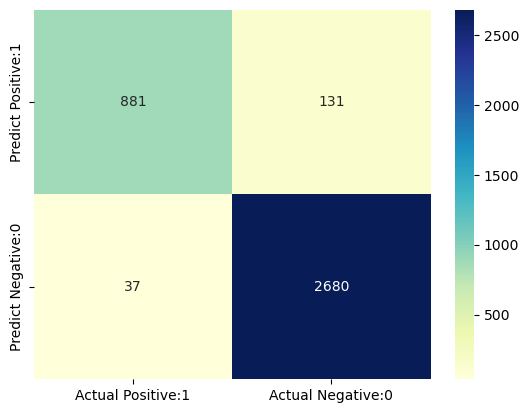

In [73]:
# Visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

cm_normalised = cm.astype('float32') / cm.sum(axis=1)[:, np.newaxis]

<AxesSubplot:>

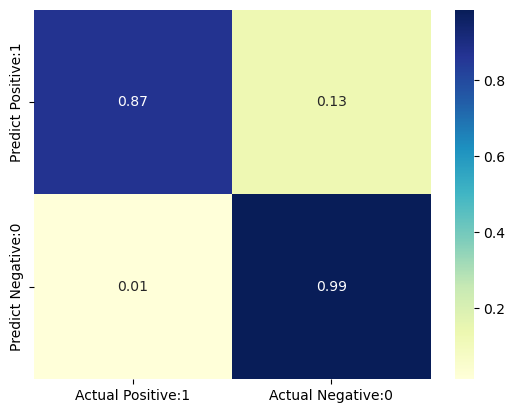

In [74]:
# Visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm_normalised, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='.2f', cmap='YlGnBu')

## Bonus (build other models)

### Decision tree

In [75]:
# Import library
from sklearn.tree import DecisionTreeRegressor

In [76]:
# Build Decision Tree model
model_DecisionTree = DecisionTreeRegressor(min_samples_leaf=.0001)

# Fit model on train data
model_DecisionTree.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_leaf=0.0001)

In [77]:
# Predict test data
y_pred_DT = model_DecisionTree.predict(X_test)

# Print accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_DT)))
print("Classification Report:\n", classification_report(y_test, y_pred_DT))

Model accuracy score: 1.0000
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1012
           1       1.00      1.00      1.00      2717

    accuracy                           1.00      3729
   macro avg       1.00      1.00      1.00      3729
weighted avg       1.00      1.00      1.00      3729



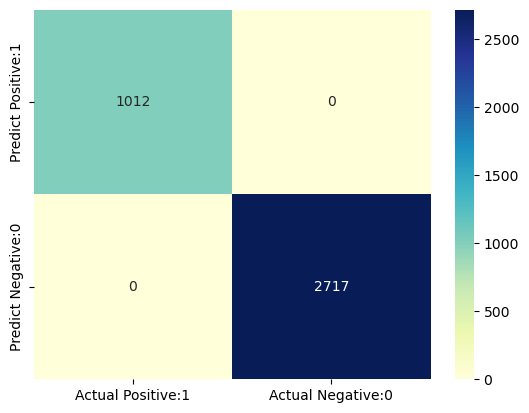

In [78]:
# Visualize confusion matrix with seaborn heatmap
cm_DT = confusion_matrix(y_test, y_pred_DT)
cm_matrix_DT = pd.DataFrame(data=cm_DT, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_DT, annot=True, fmt='d', cmap='YlGnBu')

cm_normalised_DT = cm_DT.astype('float32') / cm_DT.sum(axis=1)[:, np.newaxis]

In [79]:
# Calculate the MSE for Decision Tree model
mse_model_DT = mean_squared_error(y_test, y_pred_DT)
mse_model_DT

0.0

### MLPClassifier

In [80]:
# Import library
from sklearn.neural_network import MLPClassifier

In [81]:
# Build MLPClassifier model
model_MLP = MLPClassifier(random_state=1, max_iter=500)

# Fit model on train data
model_MLP.fit(X_train, y_train)

MLPClassifier(max_iter=500, random_state=1)

In [82]:
# Predict test data
y_pred_MLP = model_MLP.predict(X_test)

# Print accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_MLP)))
print("Classification Report:\n", classification_report(y_test, y_pred_MLP))


Model accuracy score: 0.9649
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94      1012
           1       0.98      0.97      0.98      2717

    accuracy                           0.96      3729
   macro avg       0.95      0.96      0.96      3729
weighted avg       0.97      0.96      0.96      3729



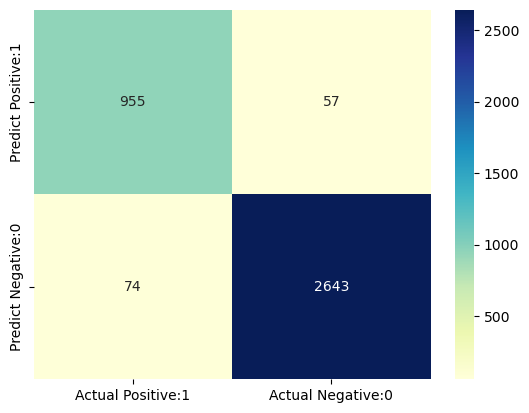

In [83]:
# Visualize confusion matrix with seaborn heatmap
cm_MLP = confusion_matrix(y_test, y_pred_MLP)
cm_matrix_MLP = pd.DataFrame(data=cm_MLP, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_MLP, annot=True, fmt='d', cmap='YlGnBu')

cm_normalised_MLP = cm_MLP.astype('float32') / cm_MLP.sum(axis=1)[:, np.newaxis]

In [84]:
# Calculate the MSE for MLPClassifier
mse_model_MLP = mean_squared_error(y_test,y_pred_MLP)
mse_model_MLP

0.035130061678734247

### Support Vector Machine

In [85]:
# Import library
from sklearn.svm import SVC

In [86]:
# Build the model
model_SVM = SVC(random_state=1)

# Fit model on train data
model_SVM.fit(X_train, y_train)

SVC(random_state=1)

In [87]:
# Predict test data
y_pred_SVM = model_SVM.predict(X_test)

# Print accuracy score
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_SVM)))
print("Classification Report:\n", classification_report(y_test, y_pred_SVM))


Model accuracy score: 0.8871
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.73      0.78      1012
           1       0.90      0.95      0.92      2717

    accuracy                           0.89      3729
   macro avg       0.87      0.84      0.85      3729
weighted avg       0.88      0.89      0.88      3729



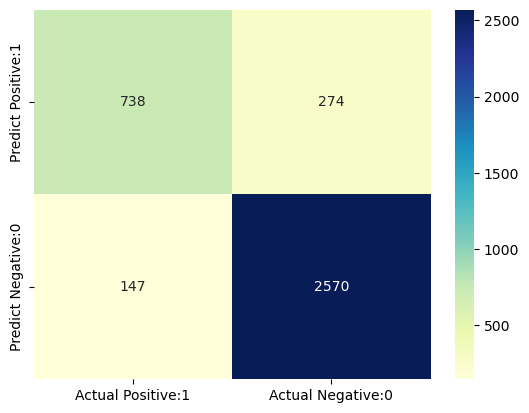

In [88]:
# Visualize confusion matrix with seaborn heatmap
cm_SVM = confusion_matrix(y_test, y_pred_SVM)
cm_matrix_SVM = pd.DataFrame(data=cm_SVM, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix_SVM, annot=True, fmt='d', cmap='YlGnBu')

cm_normalised_SVM = cm_SVM.astype('float32') / cm_SVM.sum(axis=1)[:, np.newaxis]

In [89]:
# Calculate the MSE for Support Vector Machine
mse_model_SVM = mean_squared_error(y_test,y_pred_SVM)
mse_model_SVM

0.11289890050951998